In [29]:
import numpy as np
import math
from math import exp
import numpy.linalg as linalg
from sklearn import metrics
import random
from sklearn.datasets import fetch_mldata
import cvxopt
from cvxopt import solvers
import cvxopt.base
from pylab import *
%matplotlib inline

In [30]:
def data(size,features,deviation):
    w = np.array([0.6,0.6])
    w0 = np.array([0])
    n = size/2
    #Normalized distributed data:
    X = np.append((np.random.randn(n,features)+deviation),(np.random.randn(n,features)-deviation),axis =0)
    #print X
    Y = []
    for i in range(len(X)):
        if (w0 + np.dot(w,X[i])) > 0:
            Y.append([1.0])
        elif (w0 + np.dot(w,X[i])) < 0:
            Y.append([-1.0])
    #print Y
    Y = np.array(Y)
    #lists used to plot the data
    X_pos = []
    X_neg = []
    x_neg = []
    y_neg = []
    x_pos = []
    y_pos = []
    #separating based on features.
    for i in range(len(Y)):
        if Y[i] == 1:
            X_pos.append(X[i])
            #print X[i]
        elif Y[i] == -1:
            X_neg.append(X[i])
    #print X_pos
    #print X_neg
    
    for j in range(len(X_pos)):
        x_pos.append(X_pos[j][0])
        y_pos.append(X_pos[j][1])
    #print x_pos
    #print y_pos

    for j in range(len(X_neg)):
        x_neg.append(X_neg[j][0])
        y_neg.append(X_neg[j][1])
        
    
    plt.plot(x_neg,y_neg,'ro')
    plt.plot(x_pos,y_pos,'bo')
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.show()
    return X,Y

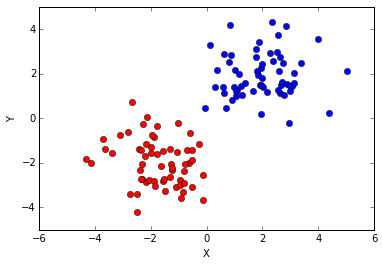

In [31]:
#linearly separable data
X_lin,Y_lin = data(120,2,2.0)

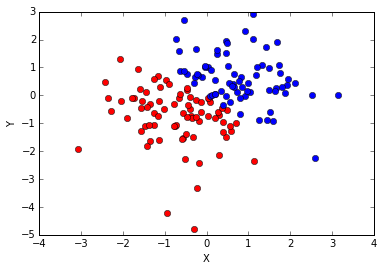

In [32]:
#linearly non separable data
X_non,Y_non = data(150,2,0.5)

In [33]:
def hard(x,y):
    W = 0
    W0 = 0
    var = x.shape[0]
    epsilon = 0
    p = cvxopt.base.matrix(np.ndarray.tolist(np.dot(y,y.T) * np.dot(x,x.T)))
    print type(p)
    q = cvxopt.base.matrix([-1.0] * var)
    gtemp = np.zeros((var, var), float)
    np.fill_diagonal(gtemp, -1.0)
    g = cvxopt.base.matrix(np.ndarray.tolist(gtemp))
    h = cvxopt.base.matrix([0.0] * var)
    a = cvxopt.base.matrix(np.ndarray.tolist(y))
    #b = [1.0]
    b = cvxopt.base.matrix(1.0)
    ld = solvers.qp(p,q,g,h,a,b) #dual problem minimization
    alpha_val = cvxopt.base.matrix(ld['x'])
    support_vector = []
    for i in range(len(alpha_val)):
            if alpha_val[i] > epsilon:
                support_vector.append(x[i])
    support_vector1 = np.matrix(support_vector)
    print support_vector1
    for j in range(len(alpha_val)):
        W = W + (alpha_val[j] * y[j] * x[i])
    for k in range((len(y))):
        W0 = W0 + (y[k] - np.dot(W,x[k]))
    W0 = W0 / len(support_vector1)
    
    return W, W0, support_vector1
    

In [52]:
def predict(x,w,w0):
    predict = []
    for i in range(len(x)):
        var1 = np.dot(w,x[i]) + w0
        if var1 < 0:
            predict.append([1])
        else:
            predict.append([-1])
    return np.array(predict)

In [53]:
def accuracy(labels,predicted):
    return metrics.accuracy_score(labels, predicted)

In [54]:
W_lin, W0_lin, SupportVector = hard(X_lin,Y_lin)

<type 'cvxopt.base.matrix'>
     pcost       dcost       gap    pres   dres
 0: -1.3780e+01 -2.6772e+01  4e+02  2e+01  2e+00
 1: -1.7599e+01 -1.4124e+01  2e+02  8e+00  8e-01
 2: -3.6842e+01 -1.7819e+01  1e+02  4e+00  4e-01
 3: -2.5219e+01 -6.8957e+00  6e+01  2e+00  2e-01
 4: -2.1376e+00 -2.3927e+00  2e+00  5e-02  5e-03
 5: -2.0084e+00 -2.0548e+00  1e-01  2e-03  3e-04
 6: -2.0437e+00 -2.0444e+00  2e-03  3e-05  3e-06
 7: -2.0443e+00 -2.0443e+00  2e-05  3e-07  3e-08
 8: -2.0443e+00 -2.0443e+00  2e-07  3e-09  3e-10
Optimal solution found.
[[ 2.62218359  2.76429494]
 [ 3.99756379  3.56191264]
 [ 2.15224443  1.16442743]
 [ 1.92659839  1.46614644]
 [ 3.14651565  2.00335628]
 [ 0.70238767  0.45347144]
 [ 2.87970196  1.52756567]
 [ 2.64308532  1.10681337]
 [ 1.76119421  2.73342768]
 [ 3.05986144  1.45312022]
 [ 5.04699035  2.12811238]
 [ 2.57244329  1.26634881]
 [ 2.97648915  1.42105998]
 [ 1.65585036  1.22027824]
 [ 2.36042956  4.33227122]
 [ 1.39024088  1.56758071]
 [ 2.51328036  2.96639005]


In [55]:
predict_lin = predict(X_lin, W_lin,  W0_lin)

In [56]:
acc = accuracy(Y_lin,predict_lin)
print "Accuracy:", acc

Accuracy: 1.0


In [57]:
W_non, W0_non, SupportVectorNon = hard(X_non,Y_non)

<type 'cvxopt.base.matrix'>
     pcost       dcost       gap    pres   dres
 0: -5.1548e+01 -1.0532e+02  6e+02  3e+01  2e+00
 1: -1.5288e+02 -1.4859e+02  3e+02  1e+01  9e-01
 2: -9.2260e+02 -8.7006e+02  3e+02  1e+01  9e-01
 3: -1.5004e+03 -1.4099e+03  4e+02  1e+01  9e-01
 4: -1.9937e+03 -1.8498e+03  6e+02  1e+01  9e-01
 5: -1.7849e+03 -1.5770e+03  1e+03  1e+01  8e-01
 6: -1.4795e+03 -1.1300e+03  1e+03  8e+00  6e-01
 7: -3.1533e+02 -4.8194e+02  3e+02  5e-01  3e-02
 8: -3.7061e+02 -3.7633e+02  9e+00  1e-02  8e-04
 9: -3.7512e+02 -3.7518e+02  9e-02  1e-04  8e-06
10: -3.7517e+02 -3.7517e+02  9e-04  1e-06  8e-08
11: -3.7517e+02 -3.7517e+02  9e-06  1e-08  8e-10
Optimal solution found.
[[  1.91563534e+00   3.78768227e-01]
 [ -6.35325312e-01   8.64927359e-01]
 [  9.11197842e-01  -3.61237571e-02]
 [ -9.80428055e-01   5.48853899e-01]
 [  1.18124836e+00   7.35057592e-01]
 [  2.21478518e-02   1.02231073e+00]
 [  7.89179030e-02  -9.16622094e-03]
 [ -1.72527676e+00  -1.10182979e-01]
 [  4.82865276e-

In [58]:
predict_non = predict(X_non, W_non,  W0_non)

In [59]:
acc_non = accuracy(Y_non,predict_non)
print "Accuracy:", acc_non

Accuracy: 0.973333333333


In [62]:
def plotsupportvector(sv,x,y):
    xsv = []
    ysv = []
    X_pos = []
    X_neg = []
    x_neg = []
    y_neg = []
    x_pos = []
    y_pos = []
    sv = np.array(sv)
    for i in range(len(sv)):
        xsv.append(sv[0])
        ysv.append(sv[1])
    
    for j in range(len(y)):
        if y[j] == 1:
            X_pos.append(x[j])
            #print X[i]
        elif y[j] == -1:
            X_neg.append(x[j])
    
    for k in range(len(X_pos)):
        x_pos.append(X_pos[k][0])
        y_pos.append(X_pos[k][1])
    
    for l in range(len(X_neg)):
        x_neg.append(X_neg[l][0])
        y_neg.append(X_neg[l][1])
            
    plt.plot(x_neg,y_neg,'ro')
    plt.plot(x_pos,y_pos,'bo')
    plt.plot(xsv,ysv,'g^')
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.show()

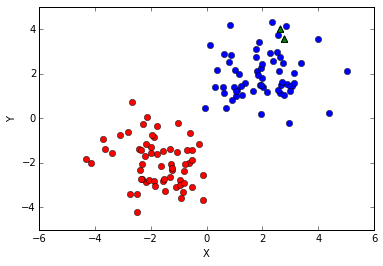

In [63]:
SVplot = plotsupportvector(SupportVector,X_lin,Y_lin)

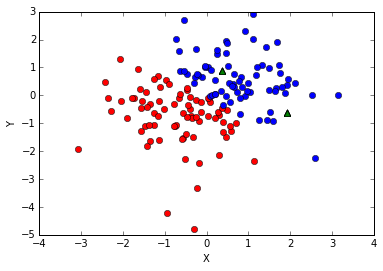

In [64]:
SVplot = plotsupportvector(SupportVectorNon,X_non,Y_non)